In [1]:
%matplotlib inline
import pylab 

from predominantmelodymakam.PredominantMelodyMakam import PredominantMelodyMakam

import os 
import json
import scipy.io
import numpy


In [2]:
extractor = PredominantMelodyMakam()

audiofolder = 'huzzam--sazsemaisi--aksaksemai----udi_nevres_bey/d2731692-626d-4a6d-9b67-a70c9e7b9745'

# we use an audio recording converted from the Robert Garfias's videos, mbid:d2731692-626d-4a6d-9b67-a70c9e7b9745
# this is a short excerpt starting from the 501st second
# NOTE: Always use wav if you need milisecond precision, to avoid the delays introduced by encoder/decoders
audiofile = os.path.join(audiofolder, 'd2731692-626d-4a6d-9b67-a70c9e7b9745_excerpt501sec.wav') 

jsonfile = os.path.join(audiofolder, 'predominantMelody.json') # json file
matfile = os.path.join(audiofolder, 'predominantMelody.mat') # matlab file
txtfile = os.path.join(audiofolder, 'predominantMelody.txt') # text file; for sonic visualizer


In [3]:
print os.path.basename(audiofile)

results = extractor.run(audiofile)

# json file
json.dump(results, open(jsonfile, 'w'))

# matlab file
scipy.io.savemat(matfile, results)

# text file; for sonic visualizer
numpy.savetxt(open(txtfile, 'w'), results['pitch'])


d2731692-626d-4a6d-9b67-a70c9e7b9745_excerpt501sec.wav


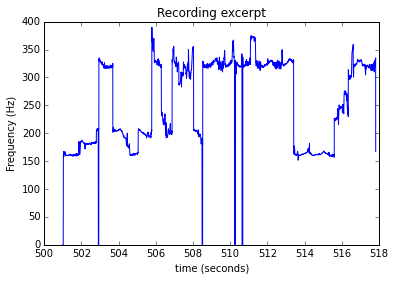

In [4]:
# plot 
tt = [p[0]+501.0 for p in results['pitch']]
pp = [p[1] for p in results['pitch']]

pylab.plot(tt, pp)
pylab.xlabel("time (seconds)")
pylab.ylabel("Frequency (Hz)")
pylab.title('Recording excerpt')
pylab.show()